<a href="https://colab.research.google.com/github/PavloZakala/CV_2024/blob/main/CV_topic_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

root_path = 'gdrive/My Drive/CV/'

Mounted at /content/gdrive


array([[108, 107, 106, ..., 181, 180, 179],
       [111, 110, 108, ..., 181, 180, 179],
       [114, 113, 111, ..., 181, 180, 179],
       ...,
       [157, 158, 158, ..., 162, 162, 162],
       [160, 160, 161, ..., 159, 159, 159],
       [163, 163, 164, ..., 155, 155, 155]], dtype=uint8)
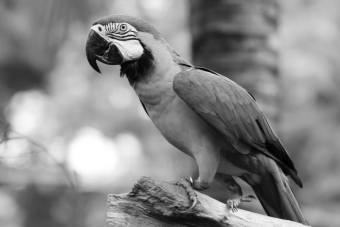

In [ ]:
import cv2

import os
import matplotlib.pyplot as plt

parrot_image = plt.imread(os.path.join(root_path, r"images/parrot.jpg"))
parrot_image = cv2.cvtColor(parrot_image, cv2.COLOR_RGB2GRAY)
parrot_image

array([[ 78,  80,  82, ..., 127, 122, 137],
       [ 74,  80,  83, ..., 124, 119, 134],
       [ 71,  73,  74, ..., 134, 125, 135],
       ...,
       [167, 161, 164, ..., 147, 146, 144],
       [173, 175, 181, ..., 141, 145, 134],
       [192, 190, 212, ..., 125, 165, 151]], dtype=uint8)
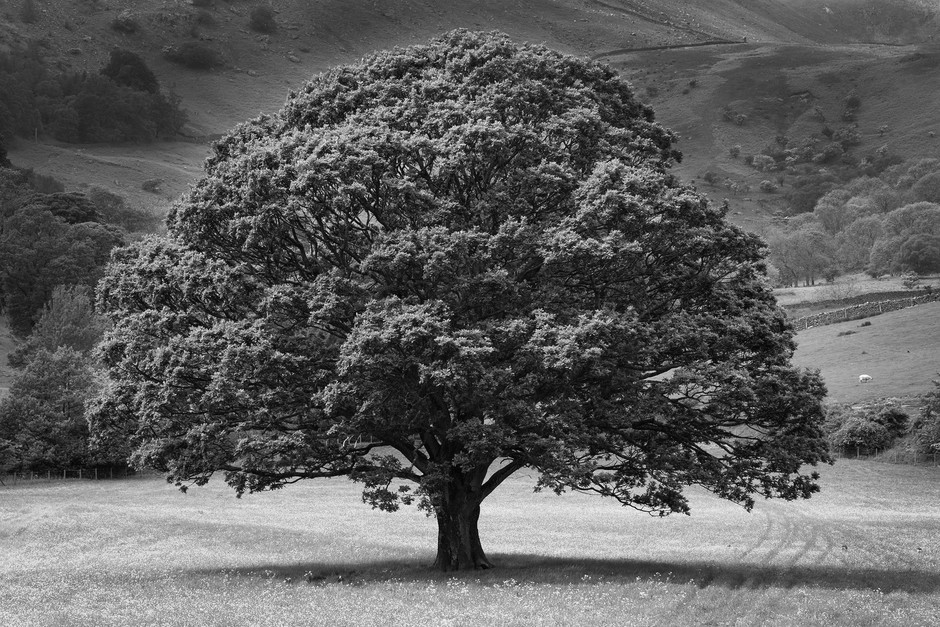

In [ ]:
tree_image = plt.imread(os.path.join(root_path, r"images/tree.jpg"))
tree_image = cv2.cvtColor(tree_image, cv2.COLOR_RGB2GRAY)
tree_image

array([[ 91,  90,  89, ...,  68,  61,  64],
       [ 91,  90,  89, ...,  68,  64,  68],
       [ 91,  90,  90, ...,  62,  64,  63],
       ...,
       [ 64, 135, 162, ...,   4,   3,   3],
       [ 76, 156, 134, ...,   9,   8,   9],
       [102, 159, 125, ...,  13,  17,  21]], dtype=uint8)
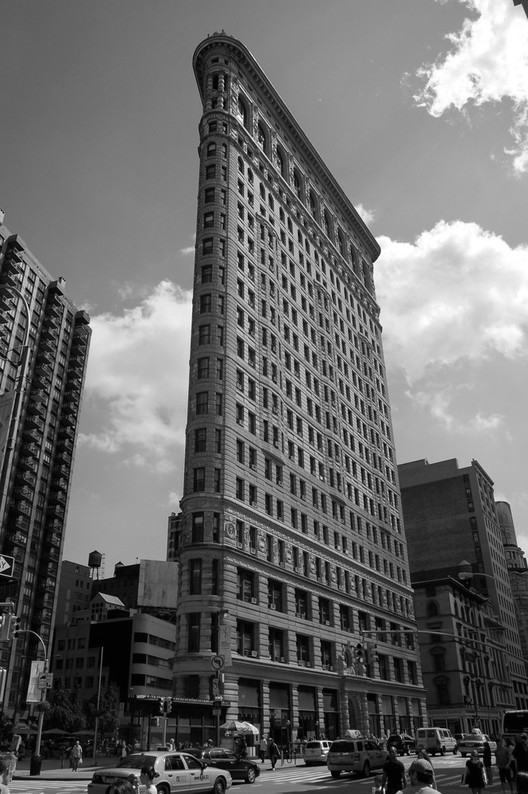

In [ ]:
building_image = plt.imread(os.path.join(root_path, r"images/building.jpg"))
building_image = cv2.cvtColor(building_image, cv2.COLOR_RGB2GRAY)
building_image

array([[ 99, 101, 104, ..., 222, 226, 252],
       [104, 107, 109, ..., 224, 227, 252],
       [110, 112, 115, ..., 227, 230, 252],
       ...,
       [121, 121, 122, ..., 100, 101, 254],
       [123, 123, 124, ..., 100, 101, 254],
       [121, 121, 121, ..., 102, 103, 254]], dtype=uint8)
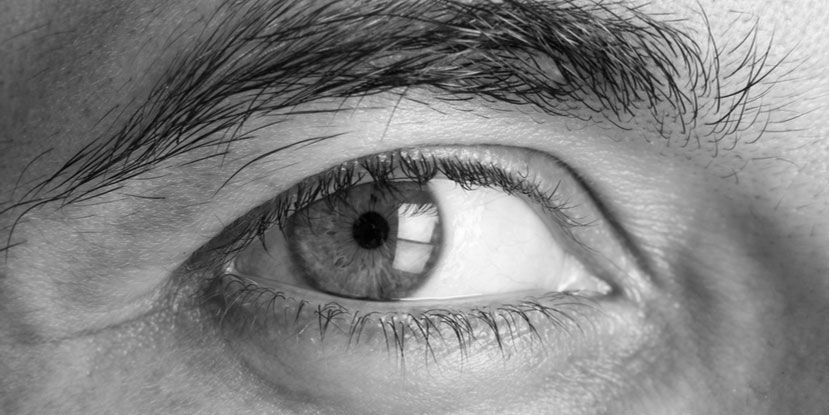

In [ ]:
eye_image = plt.imread(os.path.join(root_path, r"images/eye.jpg"))
eye_image = cv2.cvtColor(eye_image, cv2.COLOR_RGB2GRAY)
eye_image

# Edge Detectors

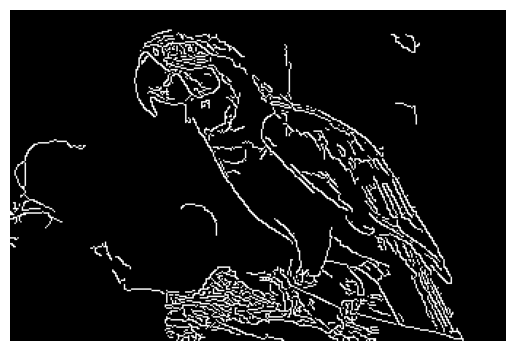

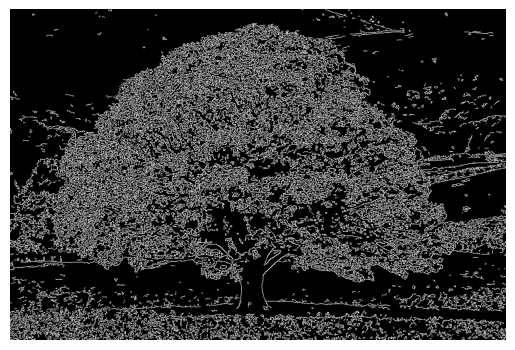

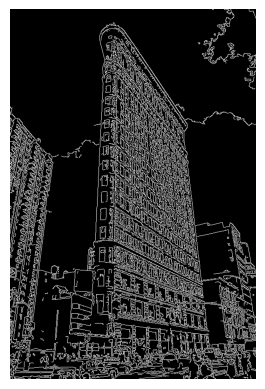

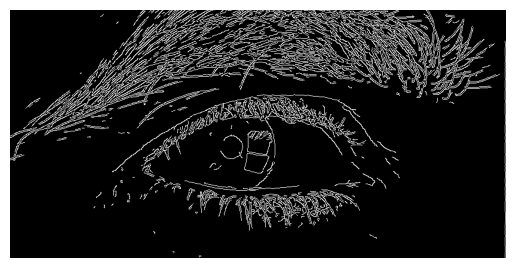

0

In [ ]:
import cv2

def canny_show(image, T_lower, T_upper):
    canny_edges = cv2.Canny(image, T_lower, T_upper)
    plt.imshow(canny_edges, cmap="gray")
    plt.axis('off')
    plt.show()
    return canny_edges

canny_show(parrot_image, 70, 150)
canny_show(tree_image, 120, 220)
building_image = canny_show(building_image, 100, 200)
canny_show(eye_image, 120, 200)
0

0 255


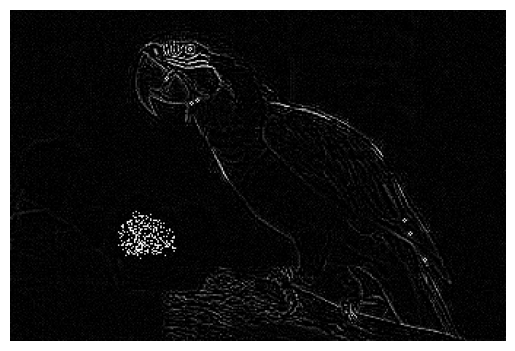

0 255


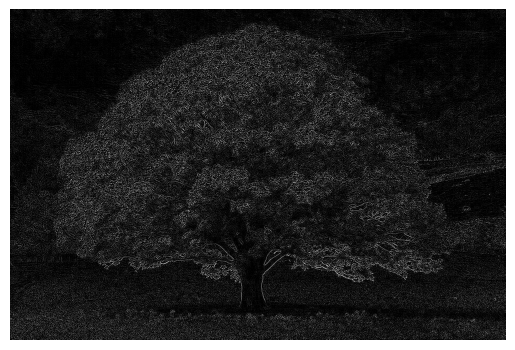

0 255


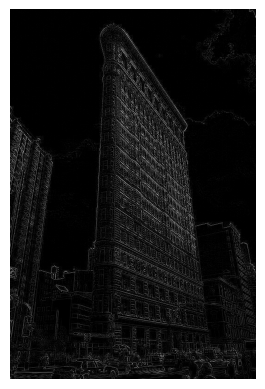

0 255


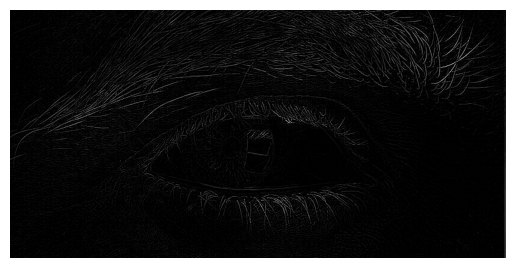

0

In [ ]:
# https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6
import numpy as np


def laplacian_show(image, ksize=1):
    laplacian_edges = cv2.Laplacian(image, -1, ksize)
    print(laplacian_edges.min(), laplacian_edges.max())
    plt.imshow(laplacian_edges, cmap="gray")
    plt.axis('off')
    plt.show()
    return laplacian_edges


laplacian_show((parrot_image + np.random.randn(parrot_image.shape[0], parrot_image.shape[1]) * 2.0).astype(np.uint8))
laplacian_show(tree_image)
laplacian_show(building_image)
laplacian_show(eye_image)

0

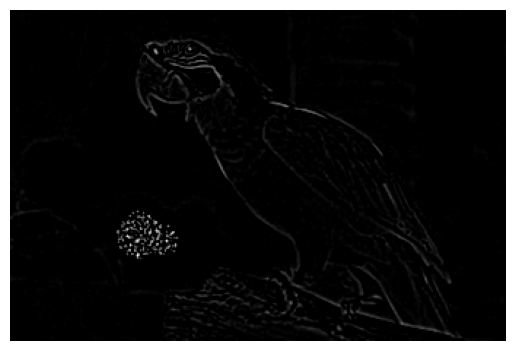

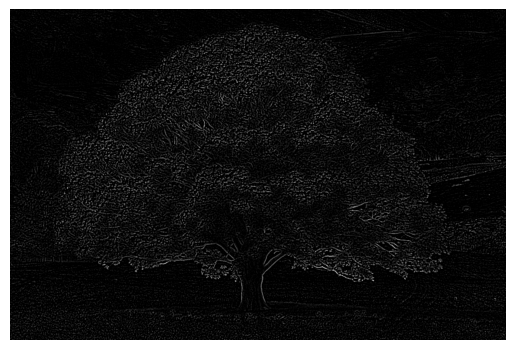

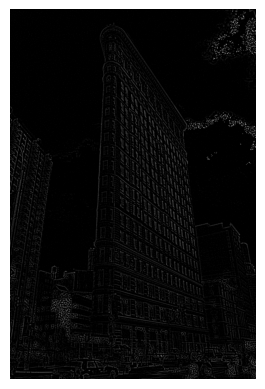

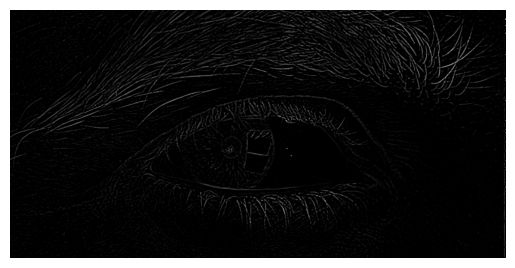

array([[ 4,  3,  1, ...,  4,  0,  0],
       [ 2,  1,  0, ...,  3,  0,  0],
       [ 0,  0,  0, ...,  1,  0,  0],
       ...,
       [ 0,  0,  0, ..., 12,  0,  0],
       [ 0,  0,  0, ...,  6, 10,  6],
       [ 0,  0,  0, ...,  1,  0,  0]], dtype=uint8)
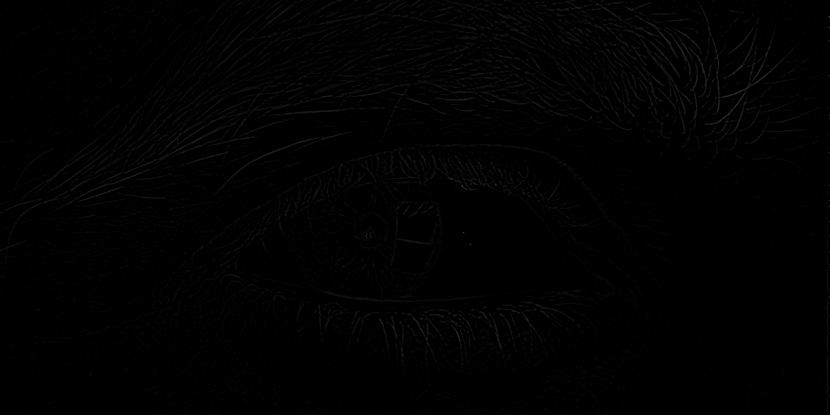

In [ ]:
def LoG(image, sigma, size=3):

    if size % 2 == 0:
        size += 1

    x, y = np.meshgrid(np.arange(-size//2+1, size//2+1), np.arange(-size//2+1, size//2+1))
    kernel = -(1/(np.pi * sigma**4)) * (1 - ((x**2 + y**2) / (2 * sigma**2))) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / np.sum(np.abs(kernel))

    result = cv2.filter2D(image, -1, kernel)

    return result

def LoG_show(image, sigma, ksize=3):
    log_edges = LoG(image, sigma, ksize)
    plt.imshow(log_edges, cmap="gray")
    plt.axis('off')
    plt.show()
    return log_edges

LoG_show((parrot_image + np.random.randn(parrot_image.shape[0], parrot_image.shape[1]) * 2.0).astype(np.uint8), 1.0, 7)
LoG_show((tree_image+ np.random.randn(tree_image.shape[0], tree_image.shape[1]) * 2.0).astype(np.uint8), 1.0, 7)
building_edges = LoG_show((building_image+ np.random.randn(building_image.shape[0], building_image.shape[1]) * 5.0).astype(np.uint8), 1.0, 7)
LoG_show((eye_image+ np.random.randn(eye_image.shape[0], eye_image.shape[1]) * 2.0).astype(np.uint8), 1.0, 7)

# Corner Detector

https://docs.opencv.org/4.x/dc/d0d/tutorial_py_features_harris.html

False True


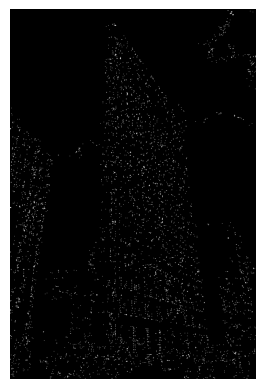

In [ ]:
def Harris_show(image, blockSize, ksize, k):
    harris_edges = cv2.cornerHarris(image, blockSize, ksize, k) > 0.05
    print(harris_edges.min(), harris_edges.max())
    plt.imshow(harris_edges, cmap="gray")
    plt.axis('off')
    plt.show()
    return harris_edges

def dilate_show(image, ksize):
    kernal = np.ones((ksize, ksize))

    dilate_edges = cv2.dilate(image, kernal)
    plt.imshow(dilate_edges, cmap="gray")
    plt.axis('off')
    plt.show()
    return dilate_edges

# building_corners = Harris_show(building_image, 2, 3, 0.04)
building_corners = Harris_show(building_image, 2, 3, 0.04)

# dilate_show(building_corners, 3)